# Simulación de una Caminata aletoria Basados en la Distribución Normal

$\{X_t\}\sim I.I.D(0,\sigma^2)$, se define la caminata aleatoria $S_t=X_0+X_1+\cdots+X_t$

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import matplotlib.pylab as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

## Creación de la caminata Aleatoria

In [3]:


n = 1000
mu_norm=0
desv_norm=2
origen = np.zeros(1)
# 

Xt = np.random.normal(mu_norm, desv_norm, n)
St = np.concatenate((origen,Xt)).cumsum()
type(St)
print(St)


numpy.ndarray

[ 0.         -0.30018371 -1.97944992 ... 65.65538498 64.95221638
 64.87233718]


### Gráfica del proceso simulado

Text(0.5, 1.0, 'Caminata Aleatoria')

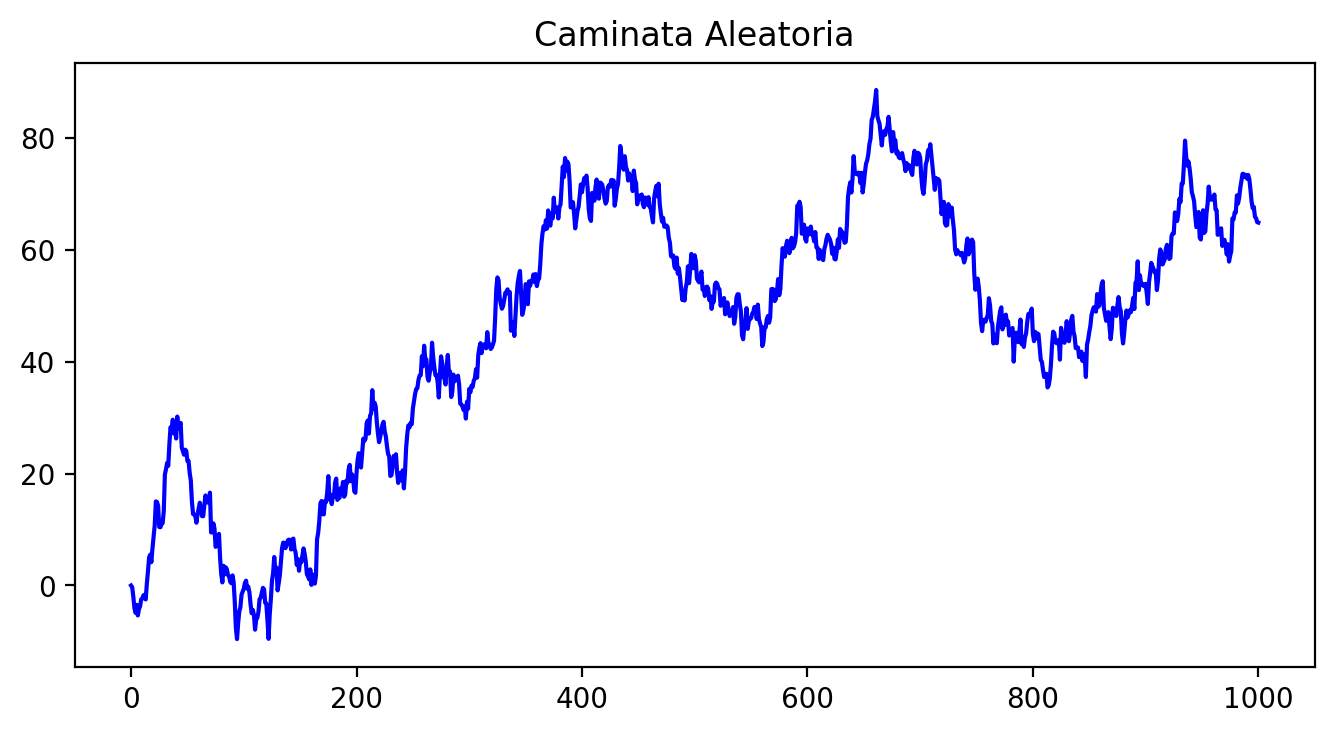

In [4]:

fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(111)
ax.plot(St, c='blue');
plt.title('Caminata Aleatoria')
#plt.savefig(‘plots/random_walk_1d.png’,dpi=250);

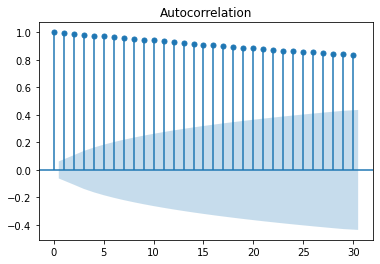

In [21]:
acfCaminataAleatoria=plot_acf(St,adjusted=False, lags=30)

In [22]:
acf(St,adjusted=False, nlags=30, fft=False)

array([1.        , 0.99413595, 0.9881535 , 0.98191853, 0.9760891 ,
       0.96991841, 0.9640984 , 0.95828311, 0.95254007, 0.94651869,
       0.94042037, 0.93404635, 0.92799573, 0.92158182, 0.91549237,
       0.90947622, 0.90373824, 0.89816337, 0.89292932, 0.88767516,
       0.88253884, 0.87738392, 0.87223667, 0.86737316, 0.86267091,
       0.85837241, 0.85378582, 0.84907853, 0.84437912, 0.83980834,
       0.83545694])

## Simulación de un Filtro Lineal invariante

$\{X_t\}\sim IID(0,\sigma^2)$, $Y_t=\sum_{j=-k}^{k}a_jX_{t-j}$

In [17]:
n=1000
k=2
mu_norm=0
desv_norm=2
coef=np.random.uniform(-1,1,2*k+1)
Xt=np.random.normal(mu_norm, desv_norm, n)
Yt =np.array([])
for j in range(k,n-k):
    Prodint = np.dot(coef,Xt[(j-k):(j+k+1)])
    Yt = np.append(Yt,Prodint)
    
print(Yt)   
len(Yt)

[ 2.78454422e+00  2.47241855e+00  1.93876107e+00 -1.78115591e+00
 -2.39674908e+00  3.16147562e+00  4.46171768e-01  2.44259809e+00
  3.68682305e+00 -4.26023887e+00  3.05205354e+00  2.82519733e+00
 -3.36048001e+00 -1.43277886e+00  1.76766798e+00  4.59528899e+00
 -2.91265333e-01  4.68262757e+00  1.29800422e+00  1.27239921e+00
  3.31622498e-01  4.31728045e+00 -3.44858388e+00  9.68342657e-01
  2.68951656e+00  1.96606377e+00 -1.99546843e+00 -3.11309291e+00
  3.11985679e+00 -3.00335592e-01  5.41930803e-01  1.13403527e+00
 -1.17721458e+00  2.58208956e+00 -1.45652642e+00 -2.12500673e+00
  1.71159583e+00 -1.48762475e+00  1.99140424e+00 -1.45998189e+00
  1.39622368e+00 -2.55334224e+00  3.01991106e-01 -7.72871435e-01
  1.59534230e+00 -3.49243412e+00  3.76271448e-01 -6.61259944e-01
  3.33137580e+00 -4.35066375e+00 -1.04273943e+00  1.77634128e+00
  2.63568491e+00  2.95670941e+00 -1.22201940e+00  2.25896706e+00
 -2.22933978e-01 -3.65064602e-01  3.47357628e+00 -2.18887254e-01
 -1.12843403e+00  8.77615

996

Text(0.5, 1.0, 'Filtro Lineal Invariate')

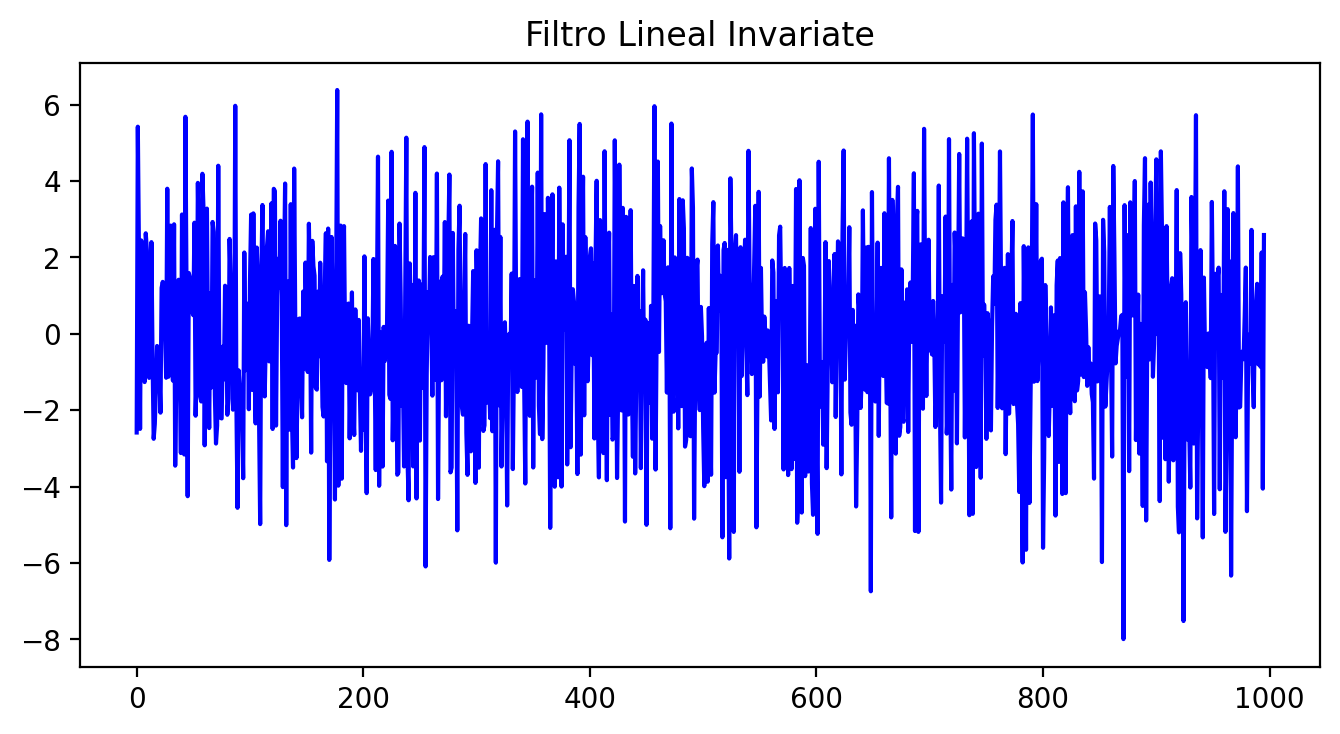

In [8]:
fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(111)
ax.plot(Yt, c='blue');
plt.title('Filtro Lineal Invariate')
#plt.savefig(‘plots/random_walk_1d.png’,dpi=250);

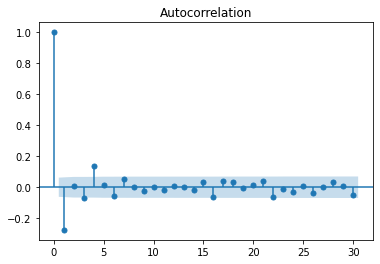

In [19]:
acfFiltroLineal=plot_acf(Yt,adjusted=False, lags=30)

In [14]:
help(plot_acf)

Help on function plot_acf in module statsmodels.graphics.tsaplots:

plot_acf(x, ax=None, lags=None, *, alpha=0.05, use_vlines=True, adjusted=False, fft=False, missing='none', title='Autocorrelation', zero=True, vlines_kwargs=None, **kwargs)
    Plot the autocorrelation function
    
    Plots lags on the horizontal and the correlations on vertical axis.
    
    Parameters
    ----------
    x : array_like
        Array of time-series values
    ax : AxesSubplot, optional
        If given, this subplot is used to plot in instead of a new figure being
        created.
    lags : {int, array_like}, optional
        An int or array of lag values, used on horizontal axis. Uses
        np.arange(lags) when lags is an int.  If not provided,
        ``lags=np.arange(len(corr))`` is used.
    alpha : scalar, optional
        If a number is given, the confidence intervals for the given level are
        returned. For instance if alpha=.05, 95 % confidence intervals are
        returned where th